In [1]:
# This is a python block

# EDA, reviews summarization, clustering DS Books

Importing the necessary Libraries

Date:- 16 June 2023

The Project uses data from Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from bs4 import BeautifulSoup
import requests

In [2]:
amazon_df = _deepnote_execute_sql('SELECT *\nFROM \'final_book_dataset_kaggle2.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
amazon_df

title  \
0    Data Analysis Using R (Low Priced Edition): A ...   
1    Head First Data Analysis: A learner's guide to...   
2    Guerrilla Data Analysis Using Microsoft Excel:...   
3    Python for Data Analysis: Data Wrangling with ...   
4    Excel Data Analysis For Dummies (For Dummies (...   
..                                                 ...   
825   Deep Learning: Engage the World Change the World   
826  Machine Learning in Finance: From Theory to Pr...   
827  Practical Deep Learning at Scale with MLflow: ...   
828  Clinical Biostatistics and Epidemiology Made R...   
829  AI and Machine Learning for Coders: A Programm...   

                                         author  price  \
0                           [ Dr Dhaval Maheta]   6.75   
1                                          None  33.72   
2            [ Oz du Soleil,  and , Bill Jelen]  32.07   
3                           [ William McKinney]  53.99   
4                             [ Paul McFedries]  24.49   
..                                          ...    ...   
825     [ Michael Fullan, Joanne Quinn, et al.]   5.33   
826  [ Matthew F. Dixon, Igor Halperin, et al.]  55.18   
827       [ Yong Liu,  and , Dr. Matei Zaharia]  44.99   
828                                        None    NaN   
829                         [ Laurence Moroney]  38.49   

    price (including used books) pages  avg_reviews n_reviews star5 star4  \
0                           6.75   500          4.4        23   55%   39%   
1                 21.49 - 33.72    484          4.3       124   61%   20%   
2                          32.07   274          4.7        10   87%   13%   
3                          53.99   547          4.6     1,686   75%   16%   
4                          24.49   368          3.9        12   52%   17%   
..                           ...   ...          ...       ...   ...   ...   
825                8.55 - 35.33    208          4.5        74   72%   14%   
826               52.41 - 55.18    573          4.5        93   78%    7%   
827                        44.99   288          4.8         8   83%   17%   
828                         None  None          NaN      None  None  None   
829                        38.49  None          4.7       142   79%   15%   

    star3 star2 star1                 dimensions       weight language  \
0      6%  None  None     8.5 x 1.01 x 11 inches  2.53 pounds  English   
1      9%    4%    6%     8 x 0.98 x 9.25 inches  1.96 pounds  English   
2    None  None  None  8.25 x 0.6 x 10.75 inches   1.4 pounds  English   
3      5%    2%    2%     7 x 1.11 x 9.19 inches  1.47 pounds  English   
4     10%   10%   10%  7.38 x 0.83 x 9.25 inches   1.3 pounds  English   
..    ...   ...   ...                        ...          ...      ...   
825    7%    2%    4%       7 x 0.47 x 10 inches  15.5 ounces  English   
826    7%    4%    4%  6.14 x 1.25 x 9.21 inches  2.25 pounds  English   
827  None  None  None   7.5 x 0.65 x 9.25 inches   1.1 pounds  English   
828  None  None  None                       None         None     None   
829    4%    1%    1%                       None         None     None   

                                             publisher         ISBN_13  \
0       Notion Press Media Pvt Ltd (November 22, 2021)  978-1685549596   
1        O'Reilly Media; 1st edition (August 18, 2009)  978-0596153939   
2    Holy Macro! Books; Third edition (August 1, 2022)  978-1615470747   
3      O'Reilly Media; 2nd edition (November 14, 2017)  978-1491957660   
4          For Dummies; 5th edition (February 3, 2022)  978-1119844426   
..                                                 ...             ...   
825          Corwin; First edition (December 15, 2017)              59   
826      Springer; 1st ed. 2020 edition (July 2, 2020)                   
827                    Packt Publishing (July 8, 2022)  978-1803241333   
828                                               None            None   
829                        

In [3]:
DeepnoteChart(amazon_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"price","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"avg_reviews","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"author","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [16]:
amazon_df = pd.read_csv('/work/final_book_dataset_kaggle2.csv', thousands=',')

In [4]:
amazon_df.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

In [5]:
amazon_df.head()

title  \
0  Data Analysis Using R (Low Priced Edition): A ...   
1  Head First Data Analysis: A learner's guide to...   
2  Guerrilla Data Analysis Using Microsoft Excel:...   
3  Python for Data Analysis: Data Wrangling with ...   
4  Excel Data Analysis For Dummies (For Dummies (...   

                               author  price price (including used books)  \
0                 [ Dr Dhaval Maheta]   6.75                         6.75   
1                                None  33.72               21.49 - 33.72    
2  [ Oz du Soleil,  and , Bill Jelen]  32.07                        32.07   
3                 [ William McKinney]  53.99                        53.99   
4                   [ Paul McFedries]  24.49                        24.49   

  pages  avg_reviews n_reviews star5 star4 star3 star2 star1  \
0   500          4.4        23   55%   39%    6%  None  None   
1   484          4.3       124   61%   20%    9%    4%    6%   
2   274          4.7        10   87%   13%  None  None  None   
3   547          4.6     1,686   75%   16%    5%    2%    2%   
4   368          3.9        12   52%   17%   10%   10%   10%   

                  dimensions       weight language  \
0     8.5 x 1.01 x 11 inches  2.53 pounds  English   
1     8 x 0.98 x 9.25 inches  1.96 pounds  English   
2  8.25 x 0.6 x 10.75 inches   1.4 pounds  English   
3     7 x 1.11 x 9.19 inches  1.47 pounds  English   
4  7.38 x 0.83 x 9.25 inches   1.3 pounds  English   

                                           publisher         ISBN_13  \
0     Notion Press Media Pvt Ltd (November 22, 2021)  978-1685549596   
1      O'Reilly Media; 1st edition (August 18, 2009)  978-0596153939   
2  Holy Macro! Books; Third edition (August 1, 2022)  978-1615470747   
3    O'Reilly Media; 2nd edition (November 14, 2017)  978-1491957660   
4        For Dummies; 5th edition (February 3, 2022)  978-1119844426   

                                                link  \
0  /Data-Analysis-Using-Low-Priced/dp/1685549594/...   
1  /Head-First-Data-Analysis-statistics/dp/059615...   
2  /Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...   
3  /Python-Data-Analysis-Wrangling-IPython/dp/149...   
4  /Excel-Data-Analysis-Dummies-Computer/dp/11198...   

                                       complete_link  
0  https://www.amazon.com/Data-Analysis-Using-Low...  
1  https://www.amazon.com/Head-First-Data-Analysi...  
2  https://www.amazon.com/Guerrilla-Analysis-Usin...  
3  https://www.amazon.com/Python-Data-Analysis-Wr...  
4  https://www.amazon.com/Excel-Data-Analysis-Dum...

## Exploratory Data Analysis

Price vs reviews

In [6]:
px.scatter(amazon_df, x = "price", 
y = "avg_reviews", labels= {'price':'Price ($)', 'avg_reviews':'Average Reviews'})

In [7]:
DeepnoteChart(amazon_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"price","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"nominal","field":"pages","scale":{"type":"linear","zero":false}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [17]:
amazon_df['pages'] = pd.to_numeric(amazon_df['pages'], errors='coerce')

In [10]:
## Price vs Pages
px.scatter(amazon_df
           , x = "price", y="pages")

In [18]:
amazon_df['star5'] = amazon_df['star5'].str.rstrip("%").astype(float)/100

In [12]:
## Price vs star5
px.scatter(amazon_df, x = "price", y="star5")

In [19]:
amazon_df['star1'] = amazon_df['star1'].str.rstrip("%").astype(float)/100
px.scatter(amazon_df, x = "price", y = "star1", labels= {'price':'Price ($)', 'star1':'star1'})

## 🧑🏽‍🏫 Best Books for python and ML

In [20]:
def best_books(amazon_df):
    """function to find the top 
    10 best books in ML and python"""    
    amazon_df['title'] = amazon_df['title'].str.lower()
    
    python_books = amazon_df[amazon_df['title'].str.contains('python')]    
    best_python_books = python_books.nlargest(10, ['n_reviews', 'avg_reviews'])
    
    ml_books = amazon_df[amazon_df['title'].str.contains('machine learning')]
    best_ml_books = ml_books.nlargest(10, ['n_reviews', 'avg_reviews'])
    
    return best_python_books, best_ml_books

In [21]:
best_python_books, best_ml_books = best_books(amazon_df)

print(f"{val}for{val} is a portal for {val}.")

In [35]:
print(f" The top 10 ML books: {list(best_ml_books['title'].unique())}")

 The top 10 ML books: ['hands-on machine learning with scikit-learn, keras, and tensorflow: concepts, tools, and techniques to build intelligent systems', 'machine learning for absolute beginners: a plain english introduction (second edition) (ai, data science, python & statistics for beginners book 3)', 'the hundred-page machine learning book', 'pattern recognition and machine learning (information science and statistics)', 'mathematics for machine learning', 'introduction to machine learning with python: a guide for data scientists', "machine learning: 4 books in 1: the #1 beginner's guide to master the basics of python programming, learn the art of data science and build artificial intelligence", 'python: learn coding programs with python programming and master data analysis & analytics, data science and machine learning with the complete crash course for beginners - 5 manuscripts in 1 book', 'ultimate step by step guide to machine learning using python: predictive modelling concept

In [36]:
print(f" The top 10 python books: {list(best_python_books['title'].unique())}")

 The top 10 python books: ['monty python and the holy grail (special edition)', 'python crash course, 2nd edition: a hands-on, project-based introduction to programming', 'python: - the bible- 3 manuscripts in 1 book: -python programming for beginners -python programming for intermediates -python programming for advanced (your place to learn python with ease)', "monty python's life of brian - the immaculate edition [blu-ray]", "monty python's life of brian [dvd]", "monty python's the meaning of life [blu-ray]", 'python: for beginners: a crash course guide to learn python in 1 week', 'automate the boring stuff with python, 2nd edition: practical programming for total beginners', 'python for everybody: exploring data in python 3', 'learning python: powerful object-oriented programming']


## 🤽🏿Clustering Book Titles

Using K-Means to form clusters
K-Means is a method to divide the data into a number of clusters.

In [37]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

## 🏃🏿‍♂️Steps:-
1) Need to convert the text to numeric that can be understood by the machine

## 2) Using Text Vectorization

## 3) using tf-idf frequency based vectorizer to vectorize the words

## 4) In all it measures how important a word is

In [38]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(amazon_df['title'])

In [39]:
print(X.shape)

(830, 6240)


In [41]:
len(vectorizer.get_feature_names_out())

6240

In [42]:
vect_df = pd.DataFrame.sparse.from_spmatrix(X, columns = vectorizer.get_feature_names_out())

In [43]:
vect_df.shape

(830, 6240)

In [44]:
vect_df.columns

Index(['001', '01', '01 2017', '10', '10 20gal', '10 coding', '10 data',
       '10 essential', '10 guide', '10 minutes',
       ...
       'zed shaw', 'zero', 'zero hero', 'zero just', 'zero pro', 'zipline',
       'zipline python', 'zoo', 'zoo med', 'zoo reptile'],
      dtype='object', length=6240)

In [45]:
sum_of_squared_distances = []

for k in range (2,10):
    Km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    Km.fit(vect_df)
    sum_of_squared_distances.append(Km.inertia_)

## 🦉What's going on in cell below?

1) Using elbow method to find out what is the optimal number of clusters for present data

2) Elbow method involves calculating sum of squared distances from each respective centroid and plot them on a graph.

3) It's obvious that more the number of clusters, less the sum of squared distances from respective centroids will be.

4) To choose the optimal number, check the point where the change in sum is not very significant but also keep in mind that the number of clusters shouldn't be too high.

In [46]:
sum_of_squared_distances

[809.28301707397,
 802.8379258244601,
 797.3054934447027,
 791.813208621392,
 787.4855103089512,
 786.3566674524574,
 782.4193390029936,
 779.3252477204699]

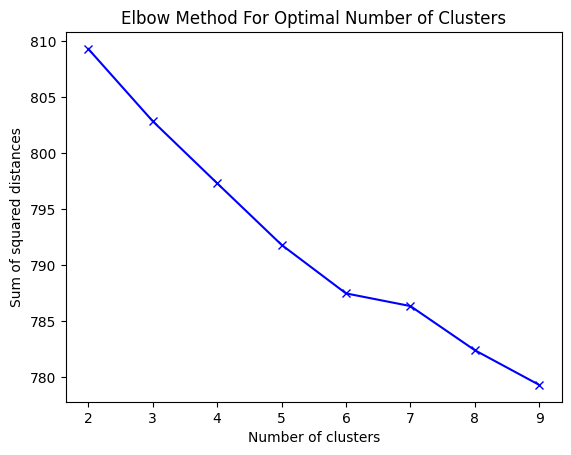

In [47]:
# Plotting for number of clusters

plt.plot(range (2,10), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [48]:
# Get clusters
true_k = 6
model = KMeans(n_clusters = true_k, max_iter = 600, n_init = 10, init = 'k-means++')
model.fit(vect_df)

# Get prediction/labels
labels = model.labels_
book_c1 = pd.DataFrame(list(zip(amazon_df['title'],labels)), columns = ['title', 'cluster'])
print(book_c1.sort_values(by = ['cluster']))

                                                 title  cluster
476  microsoft python certification exam 98-281 & p...        0
65             comptia data+ study guide: exam da0-001        0
182  hands-on javascript for python developers: lev...        0
54   sql: 3 books 1 - the ultimate beginner, interm...        0
639  the kaggle workbook: self-learning exercises a...        0
..                                                 ...      ...
554  learn python fast for absolute beginners: lear...        5
559  macramè for beginners: discover the art of mac...        5
561  the computer programming bible: a step by step...        5
541  python: python programming, in 8 hours, for be...        5
536        learning scientific programming with python        5

[830 rows x 2 columns]


In [51]:
# Prediction on foreign data

test = vectorizer.transform(['deep learning'])
model.predict(test)[0]

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



2

In [61]:
test = vectorizer.transform(['Neural Network'])
model.predict(test)[0]

4

In [55]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 KB 33.4 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
from wordcloud import WordCloud


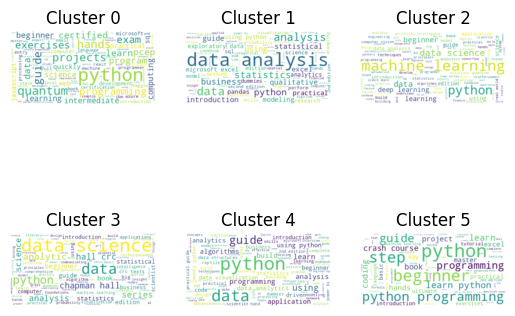

In [58]:
for k in range(true_k):
    text = book_c1[book_c1.cluster == k]['title'].str.cat(sep =' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    plt.subplot(2,3,k+1).set_title("Cluster " + str(k))
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()



## 🐤 Scrapping the web pages for Amazon book reviews

In [63]:
# Using product urls available to get reviews page by formatting them
# Some urls have different structure. Ignoring them.

def get_review_url(product_url):
    try:
        split_url = product_url.split('/dp')
        review_url = split_url[0] + '/product-reviews/' + split_url[1].split('/')[1] + '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    except:
        review_url = None
    return review_url

In [64]:
amazon_df['review_urls'] = amazon_df['complete_link'].apply(lambda x : get_review_url(x))

In [65]:
amazon_df.head(2)

title               author  \
0  data analysis using r (low priced edition): a ...  [ Dr Dhaval Maheta]   
1  head first data analysis: a learner's guide to...                  NaN   

   price price (including used books)  pages  avg_reviews  n_reviews  star5  \
0   6.75                         6.75  500.0          4.4       23.0   0.55   
1  33.72               21.49 - 33.72   484.0          4.3      124.0   0.61   

  star4 star3 star2  star1              dimensions       weight language  \
0   39%    6%   NaN    NaN  8.5 x 1.01 x 11 inches  2.53 pounds  English   
1   20%    9%    4%   0.06  8 x 0.98 x 9.25 inches  1.96 pounds  English   

                                        publisher         ISBN_13  \
0  Notion Press Media Pvt Ltd (November 22, 2021)  978-1685549596   
1   O'Reilly Media; 1st edition (August 18, 2009)  978-0596153939   

                                                link  \
0  /Data-Analysis-Using-Low-Priced/dp/1685549594/...   
1  /Head-First-Data-Analysis-statistics/dp/059615...   

                                       complete_link  \
0  https://www.amazon.com/Data-Analysis-Using-Low...   
1  https://www.amazon.com/Head-First-Data-Analysi...   

                                         review_urls  
0  https://www.amazon.com/Data-Analysis-Using-Low...  
1  https://www.amazon.com/Head-First-Data-Analysi...

In [69]:
amazon_df[amazon_df['review_urls'].isnull()].shape

(145, 20)

In [70]:
# Dataframe with books with review urls
amazon_df_review_url = amazon_df.loc[~(amazon_df['review_urls'].isnull())].reset_index()
amazon_df_review_url.shape

(685, 21)

## Adapted from https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627

In [72]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = amazon_df_review_url['review_urls']
book_titles = amazon_df_review_url['title']


def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text


def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews


def get_review_date(soup_object: BeautifulSoup):
    date_string = soup_object.find("span", {"class": "review-date"}).get_text()
    return date_string


def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()


def get_review_header(soup_object: BeautifulSoup) -> str:
    review_header = soup_object.find(
        "a",
        {
            "class": "a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"
        },
    ).get_text()
    return review_header.strip()


def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()


def get_product_name(soup_object: BeautifulSoup) -> str:
    product = soup_object.find(
        "a", {"class": "a-size-mini a-link-normal a-color-secondary"}
    ).get_text()
    return product.strip()


def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_review_date(single_review),

    }


if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title':amazon_df_review_url['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"{out.shape[0]} Total number of reviews")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(f"saving to {save_name}")
    logging.info('Done yayy')

INFO:root:https://www.amazon.com/Data-Analysis-Using-Low-Priced/product-reviews/1685549594/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Head-First-Data-Analysis-statistics/product-reviews/0596153937/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Guerrilla-Analysis-Using-Microsoft-Excel/product-reviews/1615470743/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/product-reviews/1491957662/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Excel-Data-Analysis-Dummies-Computer/product-reviews/1119844428/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Everything-Data-Analytics-Beginners-Understanding/product-reviews/B0B52FL5RT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/SQL-Dat

In [73]:
out.shape

(4340, 3)

In [74]:
out.head()

review_text  \
0  Not a good book to learn Data Science. It's ju...   
1  This is one of the best book I have ever found...   
2  Easy way to learn R with this book. Value for ...   
3  I got the book promptly.  It has that softboun...   
4               SQL in legman’s terms. Very helpful.   

                                        review_stars  \
0                Reviewed in India on March 12, 2023   
1            Reviewed in India on September 30, 2021   
2              Reviewed in India on November 7, 2021   
3  Reviewed in the United States on January 15, 2013   
4  Reviewed in the United States on February 15, ...   

                                               title  
0  data analysis using r (low priced edition): a ...  
1  data analysis using r (low priced edition): a ...  
2  data analysis using r (low priced edition): a ...  
3  head first data analysis: a learner's guide to...  
4  head first data analysis: a learner's guide to...

In [75]:
book_reviews = out
book_reviews['review_text'] = book_reviews['review_text'].astype(str)

In [76]:
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

title  \
0    100 days of code learning journal: notebook fo...   
1    2pack reptile plants hanging silk terrarium pl...   
2    a common-sense guide to data structures and al...   
3              a hands-on introduction to data science   
4    a history of data visualization and graphic co...   
..                                                 ...   
571  topological data analysis for genomics and evo...   
572  ultimate step by step guide to machine learnin...   
573  using asyncio in python: understanding python'...   
574  web scraping with python: collecting more data...   
575  zoo med reptile rock corner water dish, large ...   

                                           review_text  
0    Great book. I only bought it for the calendar ...  
1    We’ve had these for several weeks now and they...  
2    Enjoyed reading the book and getting to know f...  
3    In order to appreciate this text it is importa...  
4    Data visualization is a broad area and graphic...  
..                                                 ...  
571  This is a must book for anyone interested in t...  
572  Not sure I understand many of the other review...  
573  This book provides the information you need to...  
574  This book is great and well written. You'd be ...  
575  My 5ft ball python loves to soak in this. It h...  

[576 rows x 2 columns]

In [77]:
pip install bert-extractive-summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 KB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 KB 30.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [78]:
from summarizer import Summarizer

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

2023-06-19 07:12:05.105962: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 07:12:05.490940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-19 07:12:05.490979: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-19 07:12:05.522976: E tensorflow/stream_exe

In [80]:
book_reviews_agg['review_text'][5]

'Publication attributesTitle: A Smarter Way to Learn PythonSubtitle: Learn it faster. Remember it longer.Edition number: (1)Media type: ebookCopy type: KindleISBN number(s): 1974431479 9781974431472My reviewTo what extent did I read and/or study this book?I read the entire book and completed nearly all of the practice exercises; however, I didn’t look at any of the appendices (because I don’t need to).What fields, subjects, and topics does this book cover?It covers most of the essential functions and methods of the Python (3) computer language.What fields, subjects, and topics does this book NOT cover?This ebook does NOT include any:• programming theory (even absolute-beginner theory)• in-depth explanations or examples• comparisons with other languagesHowever, none of the above limitations are a negative criticism of the book; they merely define the book’s scope.What is the overall tone of the author’s writing style?All of the explanations are very straightforward, in the sense that th

In [81]:
len(book_reviews_agg['review_text'][5])

22322

In [83]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(book_reviews_agg['review_text'][5], ratio = 0.2))

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [84]:
from IPython.display import display, Markdown

In [85]:
display(Markdown(bert_summary))

Publication attributesTitle: A Smarter Way to Learn PythonSubtitle: Learn it faster. What is the overall tone of the author’s writing style?All of the explanations are very straightforward, in the sense that they aren’t cluttered with excessive and unnecessary academic language. Would I recommend this book to others?If you already have a vague idea of what a computer program does and how it works, and just want to dive into learning Python, this ebook and the associated practice exercises are the perfect way to begin. That said, I consider this a strong, digestible resource with effective reinforcement. Original review, Nov 2021:I first started learning Python with a different book. I remembered fundamentals from earlier chapters because they kept being used in later exercises. For instance, in Chapter 55 (about Classes), the author says the reason why you duplicate an attribute name after def __init__ is something the reader can explain to him when they're teaching at Stanford. While I respect honesty about one's limitations, this wasn't the best time for it. As a consequence, the rare exceptions stand out in stark relief. I find it interesting that early on in the studies "exercises" he flashes a message about not quitting early on in one's programming studies and that, a person can get very upset at how he poorly poses some of these questions and seems to toss in material not gone over in these "short" chapters. This system seems engineered more to piss people off and encourage them to quit than to keep on with it. Lot of flaws in this system and I feel that this author or, the authors have some work to do to develop this into its best possible form. You'll be throwing more money away to take a course using this method than you will with simply buying one of these books. What you go over briefly and, don't use consistently is NOT going to remain in your memory long enough to be of value. When he does go over things properly in his chapters and doesn't surprise with unsuspected elements inserted into questions, I do fine and get mostly correct answers. Just another slick "system" to get your cash is my judgement until, they can develop this into something real. I've struggled for years to learn a coding language, and most people I knew that knew how to code would tell me to read this or that online, or give me a bunch of books to read, but I didn't know where to start and frankly, it left me intimidated by the process and I'd procrastinate my way out of doing it. If you've already got some level of proficiency in Python, this isn't for you. Myers actually does offer a better way to learn programming. I found his HTML book to be the clearest of all the HTML books I tried. So when I took up Python, I bought Myers' book on Python. Even where the concepts are familiar, it's good to get the practice so the nuances of a new language can soak in. It's like the difference between being able to understand a foreign language and being able to speak it. Ensure that the link displayed in the Kindle is what actually appears in the browser before registering or you may register for the wrong programming language. This is arguably the best approach to get you coding fast. As I've noted I worked through several of Mark's books, the only one I haven't yet tackled is his  jQuery book. What sets "A Smarter Way to Learn Python" apart from other books is that it compels you to immediately practice what you've learned. An analogy would be trying to learn names from pictures:  you could look at a list of names and match up the pictures or your could look at the pictures and match up the names. Everything happens through the website so it helps you determine if you want to go further with it. Interesting enough, on my search for "Best" Python training guides and books I came across this. The student was really not interested in taking on this subject matter, being a kid immersed in sketch drawing and YouTube animation videos and coming from a very computer-inexperienced family.

In [87]:
display(Markdown(book_reviews_agg['review_text'][5]))

Publication attributesTitle: A Smarter Way to Learn PythonSubtitle: Learn it faster. Remember it longer.Edition number: (1)Media type: ebookCopy type: KindleISBN number(s): 1974431479 9781974431472My reviewTo what extent did I read and/or study this book?I read the entire book and completed nearly all of the practice exercises; however, I didn’t look at any of the appendices (because I don’t need to).What fields, subjects, and topics does this book cover?It covers most of the essential functions and methods of the Python (3) computer language.What fields, subjects, and topics does this book NOT cover?This ebook does NOT include any:• programming theory (even absolute-beginner theory)• in-depth explanations or examples• comparisons with other languagesHowever, none of the above limitations are a negative criticism of the book; they merely define the book’s scope.What is the overall tone of the author’s writing style?All of the explanations are very straightforward, in the sense that they aren’t cluttered with excessive and unnecessary academic language. Most of the chapters use a tone where the author is “talking down” to a beginning-level reader, but the language is never disrespectful, condescending, or silly. The author is (presumably) assuming that the reader doesn’t know anything about Python and therefore requires simple and relatable explanations.What did I like about this book?I love that this ebook comes with a complete set of practice exercises for each chapter that are extremely well-made and maintained, and don’t require any additional expense to use. In my opinion, every single technical ebook should include similar practice exercises and problems (to the extent that the evaluation of answers can be automated). Most of the learning process for computer languages is nothing more than memorizing the names and syntax of methods, and the only way to solidify memories is through repetitive practice.I also love how thorough and organized the content is, relative to the beginner-level scope. Everything a Python novice needs to get started is included, and is presented in a reasonably logical order.What did I NOT like about this book?I was sometimes mildly annoyed that a small number of the practice exercises didn’t parse correctly, and the checker stubbornly insisted that my answers were incorrect (even when I cut and pasted the correct answer). However, nothing is graded and it’s perfectly easy to skip any of the exercises, so minor glitches aren’t worth fussing over.Most of time, when I got the answers wrong, it was my fault, so I can only blame myself for not taking the time to carefully think through the exercise. However, there are some instances where the expected answer is unusually specific, so there’s a little bit of guesswork involved in determining what is expected, even when those precise expectations aren’t always explicitly stated.My conclusionsWas reading and/or studying this book worthwhile for me?Completing all of the exercises for this ebook was one of the most helpful and enjoyable self-teaching experiences I’ve ever had, and I’ve tried many of the available online courses for Python. I wish there were a lot more books like this, especially for computer-parsable subjects like math.Would I recommend this book to others?If you already have a vague idea of what a computer program does and how it works, and just want to dive into learning Python, this ebook and the associated practice exercises are the perfect way to begin.What additional materials will others need to make use of this book?Toward the end of the ebook, you’ll need to start coding small programs on your own computer (rather than using the web portal), but the ebook provides the necessary information.It also helps to have the official Python documentation website open at all times, as a reference. Everything you need to know about the language is there, including some tutorials.My ratings (0.0-5.0)Quality of content: 5Quality of writing: 5Quality of editing: 5Value to myself: 5Potential value to others: 5Review-document metadataInitial completion date: 220401Review version and revision: V1R0Template version and revision: V1R2 *edit, Feb 2022: This book helped me get my dream job (technical writer with a basic grasp of code). I do think it's worth supplementing with external exercises (potentially even app authoring), and I still think the author should develop a few select explanations in later chapters. That said, I consider this a strong, digestible resource with effective reinforcement.Original review, Nov 2021:I first started learning Python with a different book. While the material is accurate, it's also a bit dense. The intent seemed to be for the reader to automatically memorize everything that was written as soon as it was read. While I don't mind intensive study, it felt like a failure of expectation setting; the book is billed as a fast way to learn. It's not. I shelved it towards the end, when the fundamentals supposedly came together. There wasn't enough reinforcement of prior lessons, not enough practical/digestible examples for the material to sink in.I gave A Smarter Way to Learn Python a bash, and I'm happy to report I got through it in about a month of steady study. I could skip the odd day or two and be fine, since the exercises led to better retention. I remembered fundamentals from earlier chapters because they kept being used in later exercises. For example, the last set of exercises reuses fundamental math operators discussed in the first few chapters. I also appreciated the UX of the exercises; you can mark an answer as correct if you feel like you got credit (or enough of it right to pass), and you can mark others as trivial if you're ready to move on.A couple parts are glossed over too quickly for me. For instance, in Chapter 55 (about Classes), the author says the reason why you duplicate an attribute name after def __init__ is something the reader can explain to him when they're teaching at Stanford. While I respect honesty about one's limitations, this wasn't the best time for it. Part of the disappointment is that the author generally explains things in clear and digestible ways. As a consequence, the rare exceptions stand out in stark relief. If the author is wiling/able to clarify this in a future revision, that would be most welcome.Overall, I quite enjoyed the material and generally recommend it. My only tips are to a) take notes as you go (a Google Doc would be fine), and b) to use a robust IDE when the author asks you to use IDLE. VS Code with the Pylance extension is more than adequate, it more closely fits the kinds of editors in common use nowadays, and it's free. I think that the short chapters are a double edged sword of sorts. Great, you read for very little time and have a few facts on the code and syntax fresh and ready for the exercises immediately after reading. Not so great, the author throws curveballs about some stuff and concepts that he didn't go over in the chapters. The author also has a way of posing the questions in a way that can induce the person doing the exercises to wonder what it is that he wants as an answer. I find it interesting that early on in the studies "exercises" he flashes a message about not quitting early on in one's programming studies and that, a person can get very upset at how he poorly poses some of these questions and seems to toss in material not gone over in these "short" chapters. I feel that he should be going over everything that he may test you on in the chapters and make them longer instead of surprising and confusing people with stuff posed in questions and answers which, strongly seem to indicate that he "wants" you to get stuff wrong and "find" new concepts in the answers as you get them wrong. This system seems engineered more to piss people off and encourage them to quit than to keep on with it. Further, I don't see how the "retention" is going to remain intact for long. He tosses something into questions from the previous chapter with little warning and, I have already forgotten it enough to get it wrong. Often, I feel that things are implied in the questions too often as though, we know everything he knows and, I find it massively frustrating to answer correctly with syntax only to find that my answer is being accused of being wrong. Lot of flaws in this system and I feel that this author or, the authors have some work to do to develop this into its best possible form. I would most strongly advise against signing up for any course the author advises you to take for purpose of getting a job which, "uses his / their system" since, this doesn't at all seem to have a real ability to get people into a programming language retained and usable state of being any faster than any other method. You'll be throwing more money away to take a course using this method than you will with simply buying one of these books. Forget about all of the talk about the 400% retention rate crap. What you go over briefly and, don't use consistently is NOT going to remain in your memory long enough to be of value. When he does go over things properly in his chapters and doesn't surprise with unsuspected elements inserted into questions, I do fine and get mostly correct answers. When he is posing questions in his implying manner and combining that with extra material not gone over in the chapters, I am getting many more questions wrong and becoming exasperated. Just another slick "system" to get your cash is my judgement until, they can develop this into something real. I've struggled for years to learn a coding language, and most people I knew that knew how to code would tell me to read this or that online, or give me a bunch of books to read, but I didn't know where to start and frankly, it left me intimidated by the process and I'd procrastinate my way out of doing it.  I could make sense of scripts that had already been written, but couldn't write something on my own to save myself.  My learning style needs a question to answer, the more specific the better, and "how do I code?" is just too general a question.After recently spending a few months unemployed and being asked in nearly every phone interview if I had any coding skills, I decided I needed to face the music and find a way to learn this stuff, even if it meant taking a class at a local college.  Python came up a lot, so that's where I headed.  I tripped over this book completely by accident, and while the bit about "taught 50,000 people how to code, even grandmothers" made me think it was BS, I bought it anyway.  I'm only 10 chapters in, and I have to say I love the way this book teaches.If you've already got some level of proficiency in Python, this isn't for you.  If you're trying to learn a new skill, or even just have a very basic understanding of coding, this breaks it down for you and the (free) online practice is excellent.  The author begins by telling you to not to spend too much time on it (25 minutes a session max) and don't pressure yourself, and then starts teaching with a lesson less than a page long.So far, it's working.  Previously learned lessons are incorporated into the following lessons, so information is reinforced as you learn the next bit and begins the process of driving the points home.  I'm looking forward to continuing, which is saying a lot, considering I was always too confused to really want to do any of it before this. Myers actually does offer a better way to learn programming.  I found his HTML book to be the clearest of all the HTML books I tried. So when I took up Python, I bought Myers' book on Python.  He  clearly and simply explains and demonstrates each step in a short chapter, then there are interactive exercises at the end of the  chapter.The teaching method is excellent, with clear step-by-step explanations and online practice exercises.  Even where the concepts are familiar, it's good to get the practice so the nuances of a new language can soak in.  The problem is the typos.  Sometimes he leaves out a key term or puts the wrong word in his code examples.  I caught one such error in an early chapter, where I easily spotted the inconsistency with his other code examples.  Sorry I can't be more specific, since it wasn't like I could stick a post-it note in the page of the Kindle book.  But now that I'm in unfamiliar territory (chapter 68, dealing with CSV files), it was a lot harder to recognize that had used inconsistent names for the same variable "reader_of_f" in line 2 and "contents_of_f" in line 4.  Maybe the time it took me to dissect the sample code and discover the error has contributed to my comprehension of the subject, but I don't think it's the kind of pedagogy we want.I thought the chapters might be a little too repetitious for simple concepts.  I've done a bit of programming in the Arduino IDE, and  Python looks similar enough that I was sailing through the book and thinking it was a cinch.  When I stopped long enough to do some of the interactive exercises, however, I found that I needed to pay attention to practical items like where to put the parentheses, quotes, and punctuation.  It's like the difference between being able to understand a foreign language and being able to speak it.  So go ahead and skim through a chapter if you think you already understand it, but do enough of the interactive exercises to be sure that your confidence is justified and and that you can put the concepts into practice. For years, I have been avoiding the drudgery of learning another programming language. If you have been doing the same, then may I suggest that you try this method. You don't have much to lose.NOTE: When I clicked on the link in the Kindle edition I was re-directed. Ensure that the link displayed in the Kindle is what actually appears in the browser before registering or you may register for the wrong programming language.Update: I have gone through 82% of the book and had to change my review to four stars instead of five, which means I still recommend it highly. I took one star off for two reasons;1) The author REALLY emphasizes learning by doing much more than understanding. This is arguably the best approach to get you coding fast. So, on two occasions so far he would say something to the effect that ... he does not know why and if you find out you can write him and let him know. Since I like to know why, I had to refer to other books. So depending on your personality, you may have to refer to other texts, which is not unusual when you are learning.2) There are some errors. Mostly you will realize these are errors when you start to do the exercises and or refer to other texts, so look out for them. Unfortunately most Python texts are terse and dry so I will not recommend others at this time but if I have a change of heart I’ll review them so you can watch my reviews.All in all a stellar effort and I wished I could have given it 4.3 stars but Amazon does not allow for that. If you can't learn Python with this then I have NO idea what advice to give. Note that, I recommend two things a) take notes in case you take a break b) use your newfound skills ... if you don't use it you will lose it. My reviews of Mark's other books will show I am a very enthusiastic customer. Have gotten the Kindle editions of his HTML/CSS, JavaScript and now his Python book (all very inexpensively, I might add). This is the the best way to learn the basic, underlying mechanics of a programming language, because you are constantly practicing it all the way through, with short, seemingly simple chapters, that especially at first seem a little too easy. But this is how you commit it to memory and make sure you are understanding how it works beyond surface syntax once things get a little more complicated.As I've noted I worked through several of Mark's books, the only one I haven't yet tackled is his  jQuery book. I'm still inexperienced enough though to not be sure if the reason this book seemed a little less in depth on its subject compared to the JavaScript book is due to his books or due to differences between the languages being covered. Maybe JavaScript is just more complicated to learn? Or maybe Python seemed a little easier to me as I have learned several different languages at this point (having also previously learned PHP through another online source and JavaScript being the first programming language I learned after coming back after long break from first learning programming back in technical school in the early 2000's), so am unsure if just my perception has changed as to how hard it was to learn thus affecting how I view the book when reviewing?Either way, I'm still convinced this is the best way to get started in a language, then you have a great, firm foundation on which to base further, more in depth learning of a language to use in a career in the future. I should also mention, there were some errors/glitches in the exercises and in the book, but Mark gives you easy opportunity to contact him telling him where the issues exist. He always responds and acknowledges that he's heard your report of the mistakes. Still I gave it five stars as it's a great way to learn. Encourage buying and learning from this first before tackling any other resources. What sets "A Smarter Way to Learn Python" apart from other books is that it compels you to immediately practice what you've learned.  The chapters are *extremely* short and encompass one primary topic.  You then drill that one topic with a series of online questions.  The questions always follow the same format asking you the same sorts of questions in different ways.  An analogy would be trying to learn names from pictures:  you could look at a list of names and match up the pictures or your could look at the pictures and match up the names.  In both cases you're doing the same thing, but because you've changed the way in which you do it, you learn it a little more thoroughly.  The online questions for the book operate in the same fashion.I don't expect to be a Python expert by the time I complete the book, but I do find it to be a relatively engaging way to absorb the material.  It's not the only tool one would need to learn the language but it's one tool.I recommend the book for getting started with this language.  A nice bonus is that you don't have to get bogged down in installing a Python editor or anything on your computer.  Everything happens through the website so it helps you determine if you want to go further with it.  One final thing to recommend it is that if you want to learn it in little chunks, you can.  Each chapter plus online exercises will take you five minutes or so.  Unlike the chapters in most other books which will take you much longer, you can pick up and put down this one throughout the day.  That aspect works well for me.  The drawback is that you're clearly not getting the full depth of the material, but what you do learn, you learn pretty well.  Again, this goes back to the notion that you're not going to be an expert upon completion, but you should know enough that if you want to become an expert, you can. I've just started to learn to code in general and had started with codecademy.com learning Python. While codecademy is wonderful, I quickly found myself forgetting certain characters to include and felt like I needed a physical reference for me to be able to be successful. Interesting enough, on my search for "Best" Python training guides and books I came across this. Being as I felt I still wanted a physical copy (just something about a book in your hands makes it real), I ordered the paperback version.  That leads me to this. I didn't quite realize just how much more helpful this book was going to be! I decided to set aside codecademy for a moment and catch up with the book. This was a great idea. At least for me. This is why. When I was a kid I struggled with Algebra because of all the rules you just had to take at face value and the "why" seemed to always be missing. I grew to love physics, because the entire goal of physics is to explain "How?" and "Why?". I know this seems like a tangent but I have a point. If you are like me and need to know how and why a thing works so you can understand it inside and out or if you have struggled with following seemingly arbitrary rules ( of course they aren't arbitrary, it can just seem like that early on) then this book is fantastic.Mark spends time helping you to understand all the pieces in a very clear way so that way you understand them fundamentally and makes it easier to remember to do things the right way because you know why it should be.  Don't get me wrong here, I fully plan on heading back over to codecademy and other free sources, in fact, I'm excited too, but this is helping me grasp my first coding language so I CAN enjoy and thrive with those other sources.While I am not all the way through this book I feel like I am already moving at a great pace while really grasping what I'm doing in a far more constructive way that will really help build my foundation. This is proving to be worth every penny! I am a tutor and I am using Mark Meyers' book "A Smarter Way to Learn Python" to introduce a sixth grade student to computer programming. The student was really not interested in taking on this subject matter, being a kid immersed in sketch drawing and YouTube animation videos and coming from a very computer-inexperienced family. She even protested a little as we got started.But the book and highly interactive tutorial immediately drew her in and she enthusiastically followed the instructions and prompts, and she performed the exercises with focused attention. When she completed the first lesson about the print statement, I told her she had just written and run her first computer program, and she beamed in delight!For sure I will continue with this book and Mark Meyers' other books on HTML, CSS, Javascript, and JQuery because this method of immediate interactive teaching using Mark's excellent tutorial exercises along with the Trinket online interactive coding environment makes for a powerful and fun learning experience. I highly recommend this book. The author is an excellent teacher, writer, and tutorial designer.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80ac3776-a1eb-468d-9d84-37a024be95c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>